Итераций:  2
Итераций:  1
Итераций:  1
Итераций:  1
Итераций:  1
My time:  [0.05385231971740723, 0.11796188354492188, 0.2749631404876709, 0.47995662689208984, 0.7617859840393066]
lib_time:  [0.0007700920104980469, 0.001949310302734375, 0.003296375274658203, 0.007463693618774414, 0.012376785278320312]


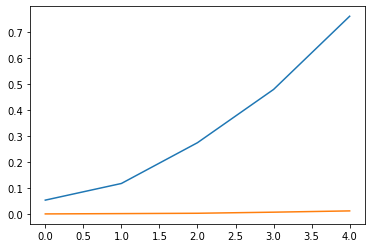

In [22]:
##### Метод Якоби итерационного решения СЛАУ #####

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import time


### Функция для вычисления одной итерации
def jacobi(A, f, x):
    n = f.size
    x_new = [0] * n
    
    for i in range(n):

        tmp = f[i]
        for j in range(n):
            if i != j:
                tmp -= A[i][j] * x[j]
        x_new[i] = tmp / A[i][i]
        
    return x_new



### Вычисление корней в цикле по заданным начальному приближению
###      и точности

def solve(A, f):
    eps = 0.1
    n = f.size
    x = [0] * n  # начальное приближение
    i = 0      # считаем для проверки количество итераций
    
    while True:
        i = i + 1
        x_new = jacobi(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]
          
    print('Итераций: ', i)
    return x_new
    

### Трансформация произвольной матрицы в матрицу
        ### с диагональным преобладанием
# Здесь суммируем модули всех элементов строки без диагонального
# Прибавляем эту сумму к диагональному элементу
def diag_domin(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A
    
    
########## Проверка метода Якоби ##############

"""
 #  Пример из лекций   
A = np.array([[2, -1, 0, -1],
              [0, 2, -1, 0],
              [-1, 1, 3, 0],
              [1, 0, -2, 4]])
f = np.array([4, 3, 2, 1])
n = f.size

x = solve(A, f)
print(x)
"""

### Реализация на матрицах 100, 200, 300 ... с диагональным преобладанием
def check_jacobi():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        x1 = np.linalg.solve(A, f) # библиотечное решение
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()
        x2 = solve(A, f)          # свое решение
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('lib_time: ', lib_time)
    
    plt.plot(my_time)
    plt.plot(lib_time)
    plt.show()
    
check_jacobi()


Итераций:  4
Итераций:  4
Итераций:  4
Итераций:  4
Итераций:  4
My time:  [0.07949376106262207, 0.3101987838745117, 0.6737747192382812, 1.2082412242889404, 1.858788013458252]

lib_time:  [0.0007474422454833984, 0.0015211105346679688, 0.02121758460998535, 0.009050846099853516, 0.012212276458740234]


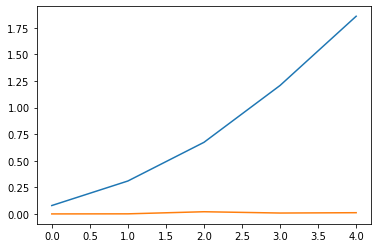

In [21]:
##### Метод Зейделя итерационного решения СЛАУ #####

import numpy as np
from math import sqrt

def seidel(A, f, x):

    n = f.size
    x_new = [0] * n
    
    for i in range(n):
        s = 0
        for j in range(i):
            s = s + A[i][j] * x_new[j]
        for j in range(i+1, n):
            s = s + A[i][j] * x[j]
        x_new[i] = (f[i] - s) / A[i][i]
        
    return x_new
    

def solve(A, f):
    
    eps = 0.001
    n = f.size
    x = [0] * n
    i = 0
    
    while True:
        i = i + 1
        x_new = seidel(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]
    
    print('Итераций: ', i)
    return x_new
    

def diag_domin(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A
    
    
########## Проверка метода Зейделя ###############

"""
 #  Пример из лекций   
A = np.array([[2, -1, 0, -1],
              [0, 2, -1, 0],
              [-1, 1, 3, 0],
              [1, 0, -2, 4]])
f = np.array([4, 3, 2, 1])
n = f.size

x = solve(A, f)
print(x)
"""

### Реализация на матрицах 100, 200, 300 ... с диагональным преобладанием
def check_seidel():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        x1 = np.linalg.solve(A, f) # библиотечное решение
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()
        x2 = solve(A, f)          # свое решение
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print()
    print('lib_time: ', lib_time)
    
    
    plt.plot(my_time)
    plt.plot(lib_time)
    plt.show()
    
check_seidel()